In [2]:
#standard python packages
import pandas as pd
import re
import numpy as np
from datetime import datetime
import tkinter as tk
from tkinter import simpledialog, scrolledtext 
from tkinter import ttk
from PIL import Image, ImageTk
from tkinter import messagebox
import math
import os

#python files in the directory
from dal_class_1 import DAL
from class_tkinter import SiteInformationApp  
from site_information_class import SiteDataProcessor
import processing_functions


Runs the downloader window

In [3]:
if __name__ == "__main__":
    root = tk.Tk()
    app = SiteInformationApp(root)
    root.mainloop()
    # Access the DataFrame after the main loop
    df_spill_hours = app.df_spill_hours
    df_rainfall_raw = app.df_rainfall_global
    df_raw_sump = app.df_raw_sump_global
    df_hour_agg_flow_meter_raw = app.df_hour_agg_flow_meter_global
    #df_raw_flow_meter = app.df_raw_flow_meter_global
    start_date_downloaded = app.start_date_global
    end_date_downloaded = app.end_date_global
    site_id_selected = app.site_id


Saves the downloaded dataframes into the /raw folder

In [4]:
# Define file paths
file_paths = {
    #"df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    "df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    "df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    "df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to save dataframes to xlsx files
def save_dataframes(**kwargs):
    for name, df in kwargs.items():
        file_path = file_paths.get(name)
        if file_path:
            df.to_excel(file_path, index=False)
            print(f"{name} saved to {file_path}")

# Example usage:
# Assuming the dataframes are already defined and available as variables
# df_spill_hours, df_rainfall, df_raw_sump, df_hour_agg_flow_meter, df_raw_flow_meter

# Save the dataframes
save_dataframes(
    #df_spill_hours=df_spill_hours,
    df_rainfall_raw=df_rainfall_raw,
    df_raw_sump=df_raw_sump,
    df_hour_agg_flow_meter_raw=df_hour_agg_flow_meter_raw
    #df_raw_flow_meter=df_raw_flow_meter
)



df_rainfall_raw saved to ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_rainfall_raw.xlsx
df_raw_sump saved to ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_raw_sump.xlsx
df_hour_agg_flow_meter_raw saved to ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_hour_agg_flow_meter_raw.xlsx


Imports the downloaded data from excel workbooks - skip this if already in the environment from the DAL

In [4]:

import os
import pandas as pd

site_id_selected = 14035
start_date_downloaded = '2022-01-01'
end_date_downloaded = '2022-12-31'

file_paths = {
    #"df_spill_hours": "../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_spill_hours.xlsx",
    "df_rainfall_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_rainfall_raw.xlsx",
    "df_raw_sump": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_sump.xlsx",
    "df_hour_agg_flow_meter_raw": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_hour_agg_flow_meter_raw.xlsx",
    #"df_raw_flow_meter": f"../data/raw/site_id{site_id_selected}_{start_date_downloaded}_to_{end_date_downloaded}_df_raw_flow_meter.xlsx"
}

# Function to load dataframes from xlsx files if they exist
def load_dataframes():
    dataframes = {}
    for name, file_path in file_paths.items():
        if os.path.exists(file_path):
            dataframes[name] = pd.read_excel(file_path)
            print(f"{name} loaded from {file_path}")
        else:
            dataframes[name] = None
            print(f"{file_path} does not exist. {name} not loaded.")
    return dataframes

# Load the dataframes if they exist
loaded_dataframes = load_dataframes()

# Access the loaded dataframes
#df_spill_hours = loaded_dataframes["df_spill_hours"]

df_rainfall_raw = loaded_dataframes["df_rainfall_raw"]
df_raw_sump = loaded_dataframes["df_raw_sump"]
df_hour_agg_flow_meter_raw = loaded_dataframes["df_hour_agg_flow_meter_raw"]
#df_raw_flow_meter = loaded_dataframes["df_raw_flow_meter"]


df_rainfall_raw loaded from ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_rainfall_raw.xlsx
df_raw_sump loaded from ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_raw_sump.xlsx
df_hour_agg_flow_meter_raw loaded from ../data/raw/site_id14035_2022-01-01_to_2022-12-31_df_hour_agg_flow_meter_raw.xlsx


In [2]:
df_raw_sump.head(10)

,TimeGMT,date,SourceSystemId,DbAddr,DbName,EValue,Year,Month,Day
0,2022-01-01 00:00:00,2022-01-01,1,51467,Default Name,41.000000,2022,1,1
1,2022-01-01 00:01:00,2022-01-01,1,51467,Default Name,44.975002,2022,1,1
2,2022-01-01 00:02:00,2022-01-01,1,51467,Default Name,31.300001,2022,1,1
3,2022-01-01 00:03:00,2022-01-01,1,51467,Default Name,22.250000,2022,1,1
4,2022-01-01 00:04:00,2022-01-01,1,51467,Default Name,21.150000,2022,1,1
5,2022-01-01 00:05:00,2022-01-01,1,51467,Default Name,28.550001,2022,1,1
6,2022-01-01 00:06:00,2022-01-01,1,51467,Default Name,37.424999,2022,1,1
7,2022-01-01 00:07:00,2022-01-01,1,51467,Default Name,47.299999,2022,1,1
8,2022-01-01 00:08:00,2022-01-01,1,51467,Default Name,34.950001,2022,1,1
9,2022-01-01 00:09:00,2022-01-01,1,51467,Default Name,22.975000,2022,1,1


In [5]:

def transform_flow_meter_data(df_hour_agg_flow_meter):
    # Create the 'TimeGMT' column by combining Year, Month, Day, and Hour columns
    df_hour_agg_flow_meter['TimeGMT'] = pd.to_datetime(
        df_hour_agg_flow_meter['Year'].astype(str) + '-' +
        df_hour_agg_flow_meter['Month'].astype(str) + '-' +
        df_hour_agg_flow_meter['Day'].astype(str) + ' ' +
        df_hour_agg_flow_meter['Hour'].astype(str) + ':00:00'
    )
    
    # Sort the dataframe by 'TimeGMT'
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter.sort_values(by="TimeGMT")
    
    # Drop unnecessary columns
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter_filtered.drop(columns=['stddev_EValue', 'count', 'DbAddr'])
    
    return df_hour_agg_flow_meter_filtered

df_hour_agg_flow_meter = transform_flow_meter_data(df_hour_agg_flow_meter_raw) 


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Make a copy of the DataFrame
df_hour_agg_flow_meter_t = df_hour_agg_flow_meter.copy()

# Convert TimeGMT to datetime
df_hour_agg_flow_meter_t['TimeGMT'] = pd.to_datetime(df_hour_agg_flow_meter_t['TimeGMT'])

# Set TimeGMT as the index
df_hour_agg_flow_meter_t.set_index('TimeGMT', inplace=True)

# Ensure the index has a frequency set
df_hour_agg_flow_meter_t = df_hour_agg_flow_meter_t.asfreq('h')

# Check if there are enough observations
if len(df_hour_agg_flow_meter_t) < 48:
    print("Not enough data points for decomposition. Need at least 48 observations.")
else:
    # Perform time series decomposition
    result = seasonal_decompose(df_hour_agg_flow_meter_t['meanEValue'], model='additive', period=24)
    # Assuming 'data' is your time series

# Remove the seasonal component
    min_value_result_seasonal = np.min(result.seasonal)
    adjusted_result_seasonal = result.seasonal - min_value_result_seasonal
    deseasonalized = df_hour_agg_flow_meter_t['meanEValue'] - adjusted_result_seasonal
    # Extract the trend component
    #df_trend = result.trend.dropna()

# Display the first few rows of the trend component
df_trend = deseasonalized



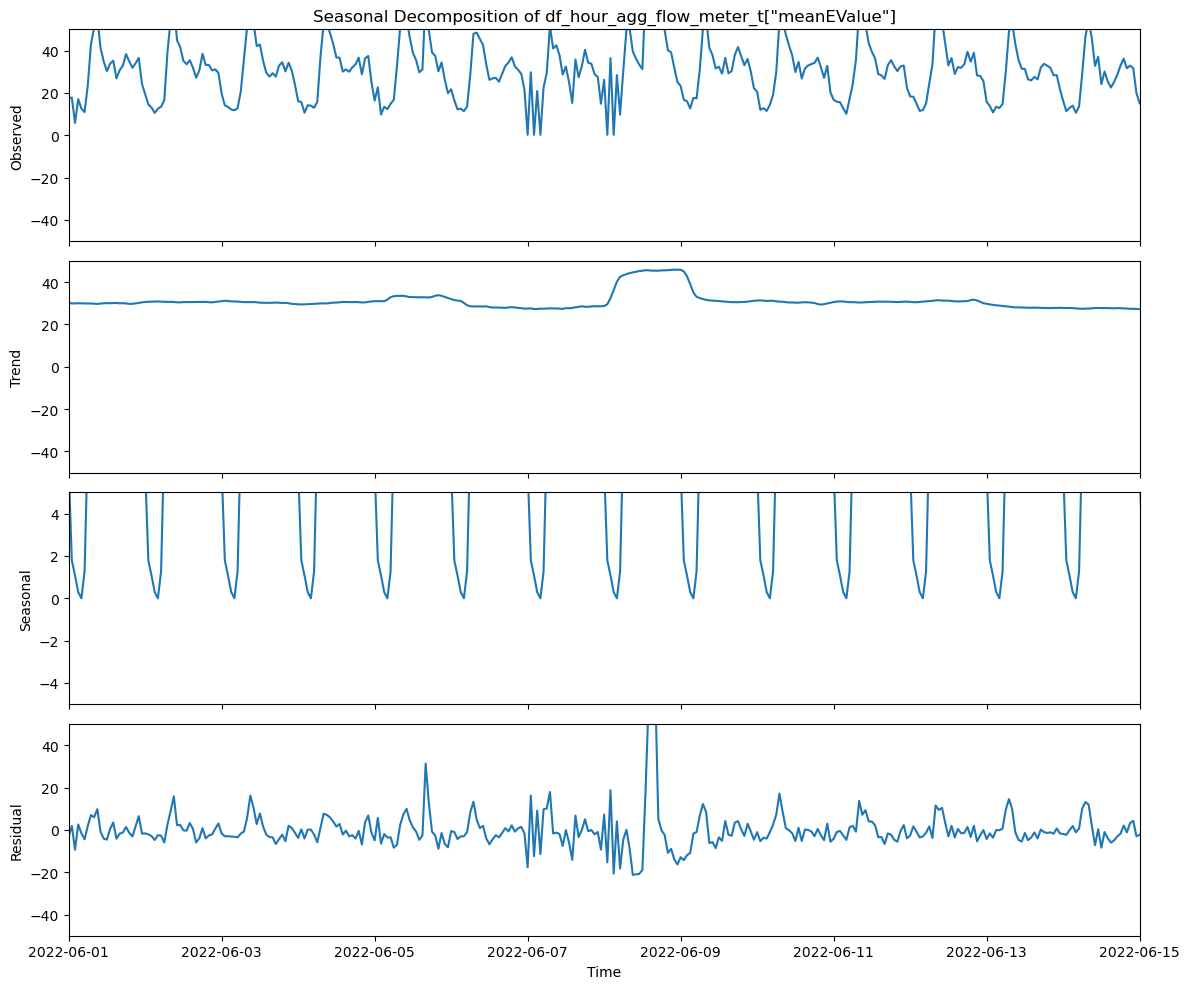

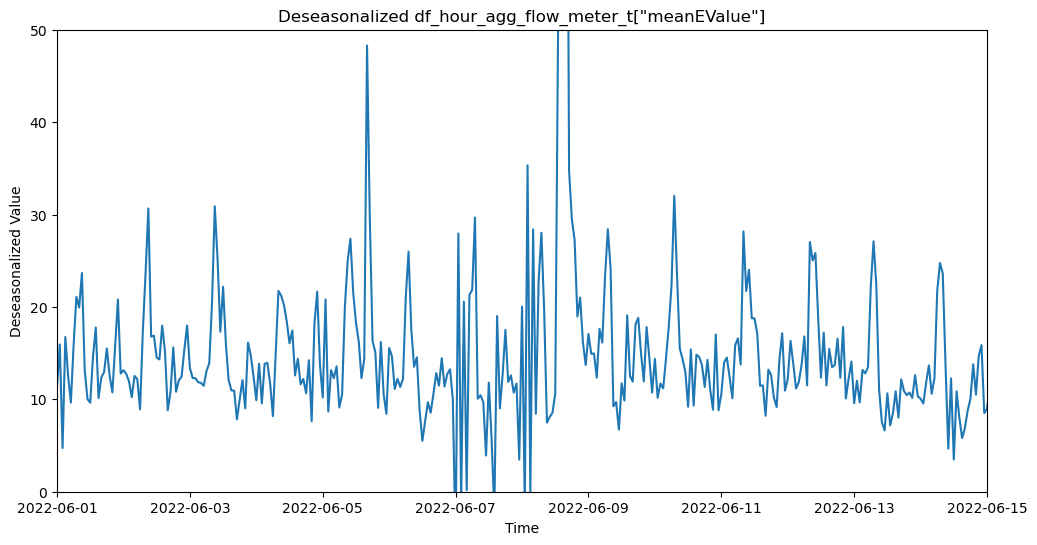

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Define your axis limits as datetime objects
x_min = pd.to_datetime('2022-06-01')
x_max = pd.to_datetime('2022-06-15')
y_min, y_max = -50, 50  # Example value range for y-axis

# Assuming the previous code has been executed and we have the 'result' and 'deseasonalized' variables

# Plot the seasonally decomposed elements
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
ax1.plot(result.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of df_hour_agg_flow_meter_t["meanEValue"]')
ax1.set_xlim([x_min, x_max])
ax1.set_ylim([y_min, y_max])

# Trend
ax2.plot(result.trend)
ax2.set_ylabel('Trend')
ax2.set_xlim([x_min, x_max])
ax2.set_ylim([y_min, y_max])

min_value_result_seasonal = np.min(result.seasonal)

adjusted_result_seasonal = result.seasonal - min_value_result_seasonal
# Seasonal
ax3.plot((adjusted_result_seasonal))
ax3.set_ylabel('Seasonal')
ax3.set_xlim([x_min, x_max])
ax3.set_ylim([-5, 5])

# Residual
ax4.plot(result.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Time')
ax4.set_xlim([x_min, x_max])
ax4.set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()

# Plot the deseasonalized data
plt.figure(figsize=(12, 6))
plt.plot(deseasonalized)
plt.title('Deseasonalized df_hour_agg_flow_meter_t["meanEValue"]')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Value')
plt.xlim([x_min, x_max])
plt.ylim([0, y_max])
plt.show()

In [8]:
# Make a copy of the DataFrame
df_hour_agg_flow_meter_t = df_hour_agg_flow_meter.copy()

# Convert TimeGMT to datetime
df_hour_agg_flow_meter_t['TimeGMT'] = pd.to_datetime(df_hour_agg_flow_meter_t['TimeGMT'])

# Set TimeGMT as the index
df_hour_agg_flow_meter_t.set_index('TimeGMT', inplace=True)

# Ensure the index has a frequency set
df_hour_agg_flow_meter_t = df_hour_agg_flow_meter_t.asfreq('h')

# Check if there are enough observations
if len(df_hour_agg_flow_meter_t) < 48:
    print("Not enough data points for decomposition. Need at least 48 observations.")
else:
    # Perform time series decomposition
    result = seasonal_decompose(df_hour_agg_flow_meter_t['meanEValue'], model='additive', period=24)

    # Create a new column 'flow_trend' in df_hour_agg_flow_meter_t
    df_hour_agg_flow_meter_t['flow_trend'] = deseasonalized

    # Fill missing values in 'flow_trend' with 'meanEValue' from the original DataFrame
    df_hour_agg_flow_meter_t['flow_trend'].fillna(df_hour_agg_flow_meter_t['meanEValue'], inplace=True)

    # Display the updated DataFrame
    print(df_hour_agg_flow_meter_t)


# Reset the index to revert 'TimeGMT' from being the index to a column
df_hour_agg_flow_meter_t.reset_index(inplace=True)



                     Hour  meanEValue  Year  Month  Day  flow_trend
TimeGMT                                                            
2022-01-01 00:00:00     0      -49.97  2022      1    1  -56.120689
2022-01-01 01:00:00     1      -49.97  2022      1    1  -51.761380
2022-01-01 02:00:00     2      -49.97  2022      1    1  -51.044953
2022-01-01 03:00:00     3      -49.97  2022      1    1  -50.263052
2022-01-01 04:00:00     4      -49.97  2022      1    1  -49.970000
...                   ...         ...   ...    ...  ...         ...
2022-12-31 19:00:00    19      137.03  2022     12   31  114.652676
2022-12-31 20:00:00    20      136.14  2022     12   31  115.028330
2022-12-31 21:00:00    21      135.10  2022     12   31  116.939983
2022-12-31 22:00:00    22      134.00  2022     12   31  118.263059
2022-12-31 23:00:00    23      133.17  2022     12   31  121.763344

[8760 rows x 6 columns]


C:\Users\RMCGINT\AppData\Local\Temp\ipykernel_21320\3580698913.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hour_agg_flow_meter_t['flow_trend'].fillna(df_hour_agg_flow_meter_t['meanEValue'], inplace=True)


This runs the time series viewer / rtk optimizer

c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\plotting_raw_data_class_e.py:19: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.end_time = pd.to_datetime(end_time)
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\RMCGINT\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "c:\Users\RMCGINT\OneDrive - Wessex Water\Python\WWDS project\scripts\plotting_raw_data_class_e.py", line 367, in fit_rtk_parameters
    df_flow_filtered = self.df_hour_agg_flow_meter_adjusted[(self.df_hour_agg_flow_meter_adjusted["TimeGMT"] >= start_date) & (self.df_hour_agg_flow_meter_adjusted["TimeGMT"] <= end_date)]
                                                             ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
TypeError: type 'DataFrame' is not su

Optimized RTK Parameters Set 1: R1 = 5.45, T1 = 0.59, K1 = 29.95
Optimized RTK Parameters Set 2: R2 = 1.42, T2 = 10.00, K2 = 19.30
Plotting synthetic flow
                 TimeGMT  SyntheticFlow
6885 2022-10-15 07:00:00      10.714247
6886 2022-10-15 08:00:00      10.632203
6887 2022-10-15 09:00:00      10.551693
6888 2022-10-15 10:00:00      13.864151
6889 2022-10-15 11:00:00      13.682088
2022-10-15 06:57:18.028800 to 2023-01-18 17:02:41.971200
              TimeGMT  SyntheticFlow
0 2022-01-01 10:00:00       0.000000
1 2022-01-01 11:00:00       0.082075
2 2022-01-01 12:00:00       0.353187
3 2022-01-01 13:00:00       1.819827
4 2022-01-01 14:00:00       1.792018
Retrieved RTK Parameters Set 1: R1 = 5.454213472621613, T1 = 0.5930973318055204, K1 = 29.949898253020276
Retrieved RTK Parameters Set 2: R2 = 1.4237233716798265, T2 = 9.999999920778581, K2 = 19.300000235083836
              TimeGMT  SyntheticFlow
0 2022-01-01 10:00:00       0.000000
1 2022-01-01 11:00:00       0.082075
2 202

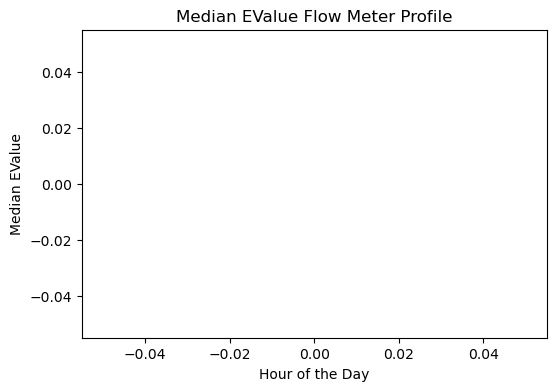

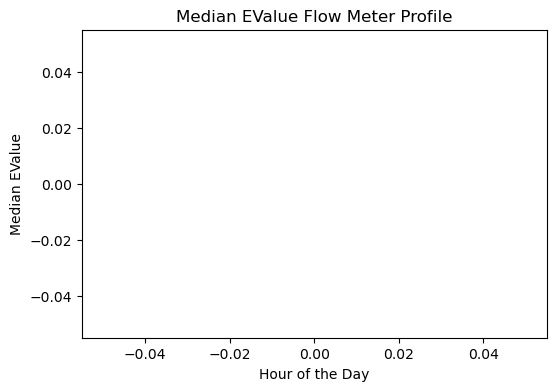

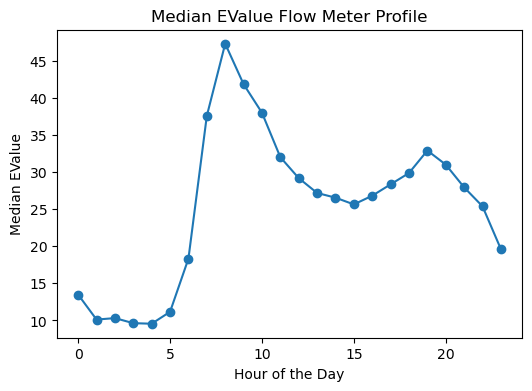

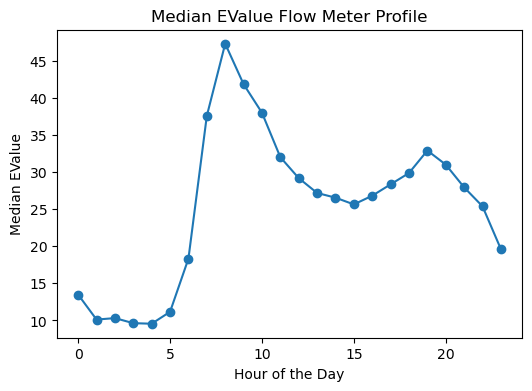

In [10]:
from plotting_raw_data_class_e import PlotWindow

df_sump_filtered = df_raw_sump
df_sump_filtered = df_sump_filtered.sort_values(by="TimeGMT")
df_rainfall= processing_functions.process_rainfall_data(df_rainfall_raw)
#df_hour_agg_flow_meter = processing_functions.transform_flow_meter_data(df_hour_agg_flow_meter_raw)

if __name__ == "__main__":
    import tkinter as tk
    root = tk.Tk()
    start_date_plot = '01-01-2022'
    end_date_plot = '31-12-2022'
    app2 = PlotWindow(root, start_date_plot, end_date_plot, df_raw_sump=df_sump_filtered, df_rainfall=df_rainfall, df_hour_agg_flow_meter=df_hour_agg_flow_meter_t, spill_level=100, sump_ylim=100, flow_ylim=120)
    root.mainloop()
    
    # Access RTK parameters and synthetic flow after the main loop ends
    R1, T1, K1, R2, T2, K2, df_synthetic_flow, flow_values, df_hour_agg_flow_meter_adjusted, median_profile = app2.get_rtk_parameters_and_synthetic_flow()
    print(f"Retrieved RTK Parameters Set 1: R1 = {R1}, T1 = {T1}, K1 = {K1}")
    print(f"Retrieved RTK Parameters Set 2: R2 = {R2}, T2 = {T2}, K2 = {K2}")
    print(df_synthetic_flow.head())


In [ ]:
print(df_synthetic_flow)


In [ ]:
plt.plot(df_synthetic_flow['TimeGMT'], df_synthetic_flow['SyntheticFlow'])
plt.show()

In [ ]:

plt.plot(df_hour_agg_flow_meter_adjusted['TimeGMT'], df_hour_agg_flow_meter_adjusted['AdjustedEValue'])
plt.show()

In [ ]:
import pandas as pd

# Assuming df_hour_agg_flow_meter and df_synthetic_flow are your DataFrames

# Merge the DataFrames on 'TimeGMT'
merged_df = pd.merge(df_hour_agg_flow_meter_adjusted, df_synthetic_flow, on='TimeGMT', how='left')

# Calculate the residual flow
merged_df['residual_flow'] = merged_df['AdjustedEValue'] - merged_df['SyntheticFlow']

# Ensure residual_flow is non-negative
merged_df['residual_flow'] = merged_df['residual_flow'].apply(lambda x: max(x, 0))

# Handle missing SyntheticFlow values by using meanEValue directly
merged_df['residual_flow'].fillna(merged_df['meanEValue'], inplace=True)

# Create the final DataFrame with 'TimeGMT' and 'residual_flow' columns
df_residual_winter_flow = merged_df[['TimeGMT', 'residual_flow']]

# Display the resulting DataFrame
print(df_residual_winter_flow.head())

In [ ]:
plt.plot(df_residual_winter_flow['TimeGMT'], df_residual_winter_flow['residual_flow'])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit, differential_evolution
from sklearn.metrics import mean_squared_error
import warnings

"""
This code generates a new set of RTK values with a seasonal (based on month) variation on R, so it's an array with 12 values. To control overfitting,
a sine wave is fitted to create "smoothed" R values. 

While in the previous process to create the first two sets of RTK values we use hourly aggregations of rainfall and flow to optimize over a relatively short training period,
here, we are looking to optimize the slow response which varies over the year, so we aggregate the rainfall and residual flow over days. 
"""

# Define the function to generate synthetic flow
def generate_synthetic_flow(rainfall, R, T, K):
    synthetic_flow = np.zeros(len(rainfall))
    for i in range(len(rainfall)):
        for j in range(i):
            if 0 <= i - j < T:
                # Rising limb
                synthetic_flow[i] += R * rainfall[j] * (i - j) / T
            elif T <= i - j < T * (K + 1):
                # Falling limb
                synthetic_flow[i] += R * rainfall[j] * (T * (K + 1) - (i - j)) / (T * K)
    return synthetic_flow

# Define the sine wave function with a period of 1 year (12 months)
def sine_wave(x, a, c, d):
    return a * np.sin(2 * np.pi * x / 12 + c) + d

# Define the weighted objective function
def weighted_objective(params, rainfall, actual_flow, months):
    R3_values = params[:12]
    T3, K3 = params[12], params[13]
    synthetic_flow = np.zeros(len(actual_flow))
    for month in range(1, 13):
        month_indices = np.where(months == month)[0]
        if len(month_indices) > 0:
            synthetic_flow[month_indices] = generate_synthetic_flow(rainfall[month_indices], R3_values[month - 1], T3, K3)
    
    # Calculate the 95th percentile of actual_flow
    percentile_95 = np.percentile(actual_flow, 95)
    
    # Create a mask to ignore errors where synthetic_flow > 95th percentile of actual_flow
    mask = synthetic_flow <= percentile_95
    
    # Calculate the weighted mean squared error
    weights = actual_flow / np.max(actual_flow)  # Higher weights for higher flow values
    return mean_squared_error(actual_flow[mask], synthetic_flow[mask], sample_weight=weights[mask])

# Ensure 'TimeGMT' is a datetime type
df_residual_winter_flow['TimeGMT'] = pd.to_datetime(df_residual_winter_flow['TimeGMT'])
df_rainfall['time_gmt_n'] = pd.to_datetime(df_rainfall['time_gmt_n'])

# Print column names before merging
print("Columns before merging:")
print(df_residual_winter_flow.columns)
print(df_rainfall[['time_gmt_n', 'Intensity(mm/hr)']].columns)

# Merge the DataFrames on the matching datetime columns with suffixes to handle duplicate columns
df_residual_winter_flow = df_residual_winter_flow.merge(df_rainfall[['time_gmt_n', 'Intensity(mm/hr)']], 
                                                        left_on='TimeGMT', right_on='time_gmt_n', how='left', 
                                                        suffixes=('_residual', '_rainfall'))

# Print column names after merging
print("Columns after merging:")
print(df_residual_winter_flow.columns)

# Check if 'Intensity(mm/hr)_rainfall' column exists
if 'Intensity(mm/hr)_rainfall' not in df_residual_winter_flow.columns:
    raise ValueError("The 'Intensity(mm/hr)_rainfall' column is missing from the DataFrame.")

# Aggregate data by day
df_residual_winter_flow['Date'] = df_residual_winter_flow['TimeGMT'].dt.date
daily_aggregates = df_residual_winter_flow.groupby('Date').agg({
    'residual_flow': 'sum',
    'Intensity(mm/hr)_rainfall': 'sum'
}).reset_index()

# Extract month from Date
daily_aggregates['Month'] = pd.to_datetime(daily_aggregates['Date']).dt.month

# Initialize arrays for R3 values and synthetic flow
initial_R3_values = np.ones(12)
bounds = [(0, 10)] * 12 + [(0, 10), (0, 10)]  # Bounds for R3, T3, K3

# Optimize the RTK parameters to fit the data using differential evolution
result = differential_evolution(weighted_objective, bounds, args=(daily_aggregates['Intensity(mm/hr)_rainfall'].values, daily_aggregates['residual_flow'].values, daily_aggregates['Month'].values))

# Check if optimization was successful
if result.success:
    optimized_params = result.x
    R3_values = optimized_params[:12]
    T3, K3 = optimized_params[12], optimized_params[13]
    print(f"Optimized R3 values: {R3_values}")
    print(f"Optimized T3: {T3:.2f}, K3: {K3:.2f}")
else:
    print("Optimization failed.")
    print("Result message:", result.message)
    R3_values = initial_R3_values
    T3, K3 = 1, 1

# Smooth the R3 values using a sine wave with a period of 1 year
x_data = np.arange(1, 13)
popt, _ = curve_fit(sine_wave, x_data, R3_values)
smoothed_R3_values = sine_wave(x_data, *popt)

# Calculate the new synthetic flow using the smoothed R3 values
synthetic_flow = np.zeros(len(daily_aggregates))
for month in range(1, 13):
    month_indices = np.where(daily_aggregates['Month'].values == month)[0]
    if len(month_indices) > 0:
        synthetic_flow[month_indices] = generate_synthetic_flow(daily_aggregates['Intensity(mm/hr)_rainfall'].values[month_indices], smoothed_R3_values[month - 1], T3, K3)

# Add the synthetic flow to the DataFrame
daily_aggregates['synthetic_flow'] = synthetic_flow

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(daily_aggregates['Date'], daily_aggregates['residual_flow'], label='Residual Flow')
plt.plot(daily_aggregates['Date'], daily_aggregates['synthetic_flow'], label='Synthetic Flow', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Flow')
plt.title('Residual Flow and Synthetic Flow')
plt.legend()
plt.grid(True)
plt.show()

# Plot the R3 values against the month
plt.figure(figsize=(8, 4))
months = np.arange(1, 13)
plt.plot(months, R3_values, marker='o', linestyle='-', color='b', label='Original R3')
plt.plot(months, smoothed_R3_values, marker='x', linestyle='--', color='r', label='Smoothed R3')
plt.xlabel('Month')
plt.ylabel('R3 Value')
plt.title('R3 Values by Month')
plt.xticks(months)
plt.legend()
plt.grid(True)
plt.show()

# Plot the synthetic flow
plt.figure(figsize=(12, 6))
plt.plot(daily_aggregates['Date'], daily_aggregates['synthetic_flow'], label='Synthetic Flow')
plt.xlabel('Date')
plt.ylabel('Synthetic Flow')
plt.title('Synthetic Flow Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def generate_model_flow(rainfall, R1, T1, K1, R2, T2, K2, R3_values, T3, K3, months, adjusted_result_seasonal, time_index, median_profile):
    # Generate synthetic flow for R1, T1, K1
    synthetic_flow1 = generate_synthetic_flow(rainfall, R1, T1, K1)
    
    # Generate synthetic flow for R2, T2, K2
    synthetic_flow2 = generate_synthetic_flow(rainfall, R2, T2, K2)
    
    # Generate synthetic flow for R3, T3, K3 (monthly varying R3)
    synthetic_flow3 = np.zeros(len(rainfall))
    for month in range(1, 13):
        month_indices = np.where(months == month)[0]
        if len(month_indices) > 0:
            synthetic_flow3[month_indices] = generate_synthetic_flow(rainfall[month_indices], R3_values[month - 1], T3, K3)
    
    # Extend adjusted_result_seasonal to cover the entire range of the rainfall data
    extended_seasonal = np.tile(adjusted_result_seasonal, len(rainfall) // len(adjusted_result_seasonal) + 1)[:len(rainfall)]
    
    # Calculate baseflow using the median_profile values based on the hour of the day
    baseflow = np.array([median_profile.get(hour, 0) for hour in time_index.dt.hour])
    
    # Sum the synthetic flows, the extended seasonal component, and the baseflow
    model_flow = synthetic_flow1 + synthetic_flow2 + synthetic_flow3 + extended_seasonal + baseflow
    return model_flow, synthetic_flow1, synthetic_flow2, synthetic_flow3, extended_seasonal, baseflow

# Assuming R1, T1, K1, R2, T2, K2, adjusted_result_seasonal, and median_profile are already defined and optimized earlier in the code

# Ensure 'time_gmt_n' is a datetime type
df_rainfall['time_gmt_n'] = pd.to_datetime(df_rainfall['time_gmt_n'])
df_hour_agg_flow_meter_adjusted['TimeGMT'] = pd.to_datetime(df_hour_agg_flow_meter_adjusted['TimeGMT'])



# Generate the full modeled rainfall response using hourly data
full_modelled_rainfall_response, synthetic_flow1, synthetic_flow2, synthetic_flow3, extended_seasonal, baseflow = generate_model_flow(
    rainfall=df_rainfall['Intensity(mm/hr)'].values,
    R1=R1, T1=T1, K1=K1,
    R2=R2, T2=T2, K2=K2,
    R3_values=smoothed_R3_values, T3=T3, K3=K3,
    months=df_rainfall['time_gmt_n'].dt.month.values,
    adjusted_result_seasonal=adjusted_result_seasonal,
    time_index=df_rainfall['time_gmt_n'],
    median_profile=median_profile
)

# Add the full modeled rainfall response and individual synthetic flows to the DataFrame
df_rainfall['full_modelled_rainfall_response'] = full_modelled_rainfall_response
df_rainfall['synthetic_flow1'] = synthetic_flow1
df_rainfall['synthetic_flow2'] = synthetic_flow2
df_rainfall['synthetic_flow3'] = synthetic_flow3
df_rainfall['extended_seasonal'] = extended_seasonal
df_rainfall['baseflow'] = baseflow

# Merge the modeled response with the flow meter data for comparison
df_comparison = df_hour_agg_flow_meter_adjusted.merge(
    df_rainfall[['time_gmt_n', 'full_modelled_rainfall_response', 'synthetic_flow1', 'synthetic_flow2', 'synthetic_flow3', 'extended_seasonal', 'baseflow']],
    left_on='TimeGMT', right_on='time_gmt_n', how='left'
)

# Define start and end times for plotting
start_time = pd.to_datetime('2023-03-01')
end_time = pd.to_datetime('2023-03-15')

# Filter the data based on the specified time range
df_comparison_filtered = df_comparison[(df_comparison['TimeGMT'] >= start_time) & (df_comparison['TimeGMT'] <= end_time)]

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['meanEValue'], label='meanEValue')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['full_modelled_rainfall_response'], label='Full Modelled Rainfall Response', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow1'], label='Synthetic Flow 1', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow2'], label='Synthetic Flow 2', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow3'], label='Synthetic Flow 3', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['extended_seasonal'], label='Extended Seasonal', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['baseflow'], label='Baseflow', linestyle='--')
plt.xlabel('TimeGMT')
plt.ylabel('Flow')
plt.title('MeanEValue and Full Modelled Rainfall Response')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define start and end times for plotting
start_time = pd.to_datetime('2023-09-01')
end_time = pd.to_datetime('2023-09-30')

# Filter the data based on the specified time range
df_comparison_filtered = df_comparison[(df_comparison['TimeGMT'] >= start_time) & (df_comparison['TimeGMT'] <= end_time)]

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['meanEValue'], label='meanEValue')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['full_modelled_rainfall_response'], label='Full Modelled Rainfall Response', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow1'], label='Synthetic Flow 1', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow2'], label='Synthetic Flow 2', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['synthetic_flow3'], label='Synthetic Flow 3', linestyle='--')
plt.plot(df_comparison_filtered['TimeGMT'], df_comparison_filtered['extended_seasonal'], label='Extended Seasonal', linestyle='--')
plt.xlabel('TimeGMT')
plt.ylabel('Flow')
plt.title('MeanEValue and Full Modelled Rainfall Response')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Sample data for demonstration (replace with your actual data)
num_hours = len(pd.date_range(start='2023-01-01', end='2023-09-30', freq='H'))
df_rainfall = pd.DataFrame({
    'TimeGMT': pd.date_range(start='2023-01-01', end='2023-09-30', freq='H'),
    'full_modelled_rainfall_response': np.random.rand(num_hours)
})

# User-defined PFF value and max_system_storage
PFF = 40  # Example value for PFF, you can set this value as needed
max_system_storage = 10  # Example value for max_system_storage, you can set this value as needed

# Assuming the time interval is 1 hour
time_interval = 1

# Add new columns to df_rainfall
df_rainfall['storage_variation m^3/h'] = df_rainfall['full_modelled_rainfall_response'] * time_interval * 3.6
df_rainfall['storage_variation m^3/h'] = df_rainfall['storage_variation m^3/h'].apply(lambda x: (x - PFF * 3.6) if x > PFF * 3.6 else -x)

# Initialize mobilised_storage and flood_volume
df_rainfall['mobilised_storage'] = 0
df_rainfall['flood_volume'] = 0

# Calculate mobilised_storage and flood_volume
for i in range(len(df_rainfall)):
    if i == 0:
        df_rainfall.at[i, 'mobilised_storage'] = max(0, df_rainfall.at[i, 'storage_variation m^3/h'])
    else:
        new_storage = df_rainfall.at[i-1, 'mobilised_storage'] + df_rainfall.at[i, 'storage_variation m^3/h']
        if new_storage > max_system_storage:
            df_rainfall.at[i, 'mobilised_storage'] = max_system_storage
            if df_rainfall.at[i, 'storage_variation m^3/h'] > 0:
                df_rainfall.at[i, 'flood_volume'] = df_rainfall.at[i-1, 'flood_volume'] + (new_storage - max_system_storage)
            else:
                df_rainfall.at[i, 'flood_volume'] = df_rainfall.at[i-1, 'flood_volume']
        else:
            df_rainfall.at[i, 'mobilised_storage'] = max(0, new_storage)
            df_rainfall.at[i, 'flood_volume'] = df_rainfall.at[i-1, 'flood_volume']

# Print the head of the new dataframe
print(df_rainfall.head())